In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('data/GlobalTemperatures.csv')

In [5]:
data.loc[:5]

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
5,1750-06-01,12.937,1.724,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dates = data['dt']

In [7]:
dates.loc[0]

'1750-01-01'

In [8]:
def date_transform(date):
    date = date.split('-')
    return int(date[0])*100+int(date[1])

In [9]:
dates = dates.apply(date_transform)

In [10]:
x = dates[:12]
y = data['LandAverageTemperature'][:12]
error =  data['LandAverageTemperatureUncertainty'][:12]
plt.rcParams['figure.figsize'] = [15, 5]

Text(0, 0.5, 'Temperature in degree C')

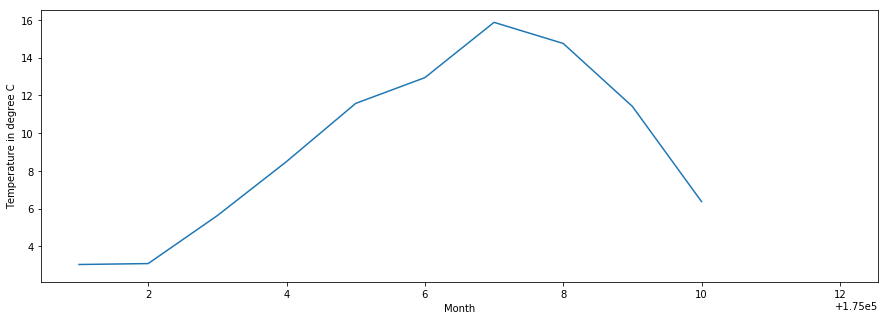

In [11]:
plt.plot(x, y, label='both limits (default)')
plt.xlabel('Month')
plt.ylabel('Temperature in degree C')

## Plotting year-wise variation from 1750 - 2015 on a month scale

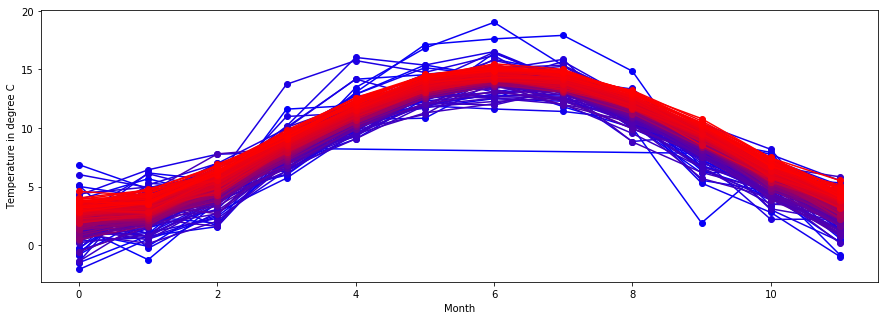

In [12]:
x = np.arange(0,12)
for i in range(266):
    y = np.array(data['LandAverageTemperature'][i*12:(i+1)*12])
    nanmask = np.isfinite(y)
    #error =  data['LandAverageTemperatureUncertainty'][i*12:(i+1)*12]
    color = (0.0+ i/266, 0.0 ,1 - i/266)
    plt.plot(x[nanmask], y[nanmask], color = color ,linestyle='-', marker='o')

    plt.xlabel('Month')
    plt.ylabel('Temperature in degree C')
    
    

## Average Temperature by year

In [13]:
data['datetime'] = pd.to_datetime(data.dt)

In [14]:
data['year'] = pd.DatetimeIndex(data.datetime).year
data['month'] = pd.DatetimeIndex(data.datetime).month

In [15]:
# data.month.value_counts()

In [16]:
land_avg_by_yr = data.groupby('year')['LandAverageTemperature'].mean()
data['decade'] = ((data.year//10)*10)
land_avg_by_decade = data.groupby('decade')['LandAverageTemperature'].mean()

In [17]:
def two_subplots(df1, df2, title1, title2):
    plt.figure(figsize=(16,5))
    plt.subplot(121)
    df1.plot(title = title1)
    plt.subplot(122)
    df2.plot(title = title2)
    plt.show()

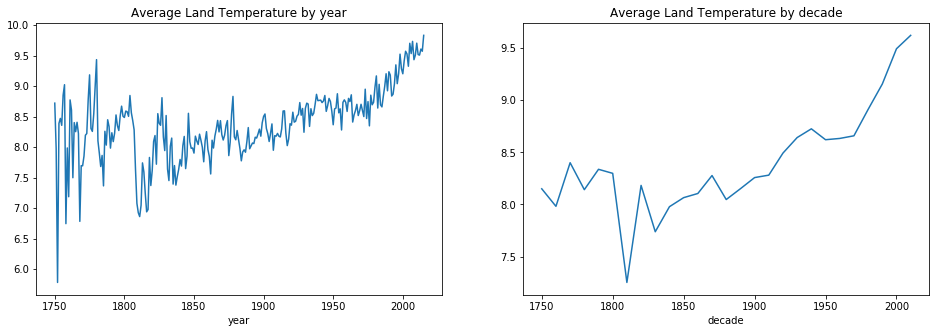

In [18]:
two_subplots(land_avg_by_yr, land_avg_by_decade, 'Average Land Temperature by year'\
            , 'Average Land Temperature by decade')

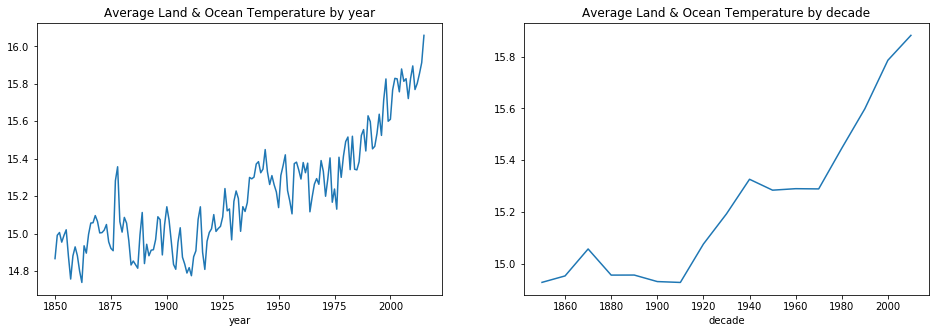

In [19]:
avg_by_yr = data.groupby('year')['LandAndOceanAverageTemperature'].mean()
avg_by_decade = data.groupby('decade')['LandAndOceanAverageTemperature'].mean()

# as no data before 1850
avg_by_yr.dropna(inplace=True)
avg_by_decade.dropna(inplace=True)

two_subplots(avg_by_yr, avg_by_decade, 'Average Land & Ocean Temperature by year'\
            , 'Average Land & Ocean Temperature by decade')

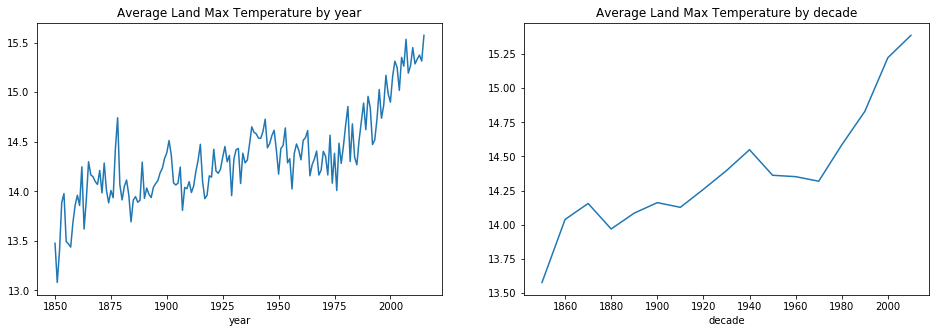

In [20]:
# LandMaxTemperature
# data.LandMaxTemperature.plot()

avg_max_temp_by_yr = data.groupby('year')['LandMaxTemperature'].mean()
avg_max_temp_by_decade = data.groupby('decade')['LandMaxTemperature'].mean()

# as no data before 1850
avg_max_temp_by_yr.dropna(inplace=True)
avg_max_temp_by_decade.dropna(inplace=True)

two_subplots(avg_max_temp_by_yr, avg_max_temp_by_decade, 'Average Land Max Temperature by year'\
            , 'Average Land Max Temperature by decade')

### Lowest temperature by year/decade

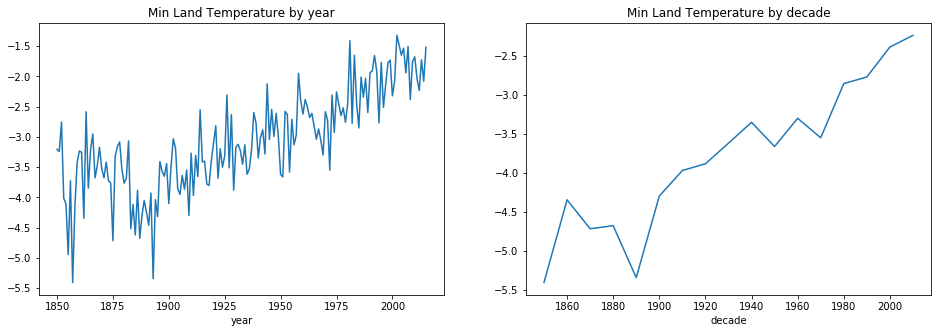

In [21]:
min_temp_by_yr = data.groupby('year')['LandMinTemperature'].min()
min_temp_by_decade = data.groupby('decade')['LandMinTemperature'].min()

# as no data before 1850
min_temp_by_yr.dropna(inplace=True)
min_temp_by_decade.dropna(inplace=True)

two_subplots(min_temp_by_yr, min_temp_by_decade, 'Min Land Temperature by year'\
            , 'Min Land Temperature by decade')

### We have demonstrated how the different statistics related to surface temperature show an increasing trend
- per-year average variation over different months
- average land temperature over the years and over decade (less noisy estimate)
- average land and ocean temperature over years and decade
- min and max averages over year for different years and decade


## Next Steps:
- Better Visualization of above trends (scatter plots instead of line plots with regression trend)
- Quantifying increase
    - Predictive analysis (regression estimates)
- Correlating increase in temperature with human-events

In [35]:
data = pd.read_csv("data/GlobalLandTemperaturesByCountry.csv");

In [36]:
import plotly.offline as py
global_temp_country = data

In [37]:
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [68]:
#Let's remove the duplicated countries (in the analysis, we don't consider the presence of 
#colonies at this the countries) and countries for which no information about the temperature

global_temp_country_clear = global_temp_country[~global_temp_country['Country'].isin( \
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands', \
     'United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

#Let's average temperature for each country

countries = np.unique(global_temp_country_clear['Country'])
first_temp = []
last_temp = []
difference = []
for country in countries:
    first_temp.append(global_temp_country_clear[global_temp_country_clear['Country'] == 
                                               country]['AverageTemperature'].dropna().iat[0])
    last_temp.append(global_temp_country_clear[global_temp_country_clear['Country'] == 
                                               country]['AverageTemperature'].dropna().iat[-1])
    difference.append(last_temp[-1] - first_temp[-1])

    
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = first_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

layout = dict(
    title = 'Earliest Recorded Average land temperature in countries (~1800)',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        type = 'equirectangular'
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = last_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

layout = dict(
    title = 'Latest Recorded Average land temperature in countries (~2013)',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        type = 'equirectangular'
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = difference,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorscale = 'Reds',
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature\nChange,\n°C')
            )
       ]

layout = dict(
    title = 'Difference between Latest (~2013) and Earliest (~1800) recorded Average land temperature in countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        type = 'equirectangular'
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')


In [72]:
# Normalized Difference
norm_difference = [difference[i]/abs(first_temp[i]) for i in range(len(difference))]

data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = norm_difference,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorscale = 'Reds',
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature\nChange,\n°C')
            )
       ]

layout = dict(
    title = 'Normalized Difference between Latest and Earliest recorded Average land temperature in countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        type = 'equirectangular'
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')
